# Marketing de Instituição Bancária

Nome: Fabio Gustavo Gomes Vaz<br/>
RA: 00282997<p>
Nome: Felipe Fernandes Rojas<br/>
RA: 00282999<p>
**Projeto Final das disciplinas Projeto Integrado & Base de Dados, do curso de Ciência de Dados e Inteligência Artificial da PUC-SP**

## Questão de projeto
Como otimizar as ligações da equipe de telemarketing de uma Instituição Bancária, reduzindo o tempo gasto e aumentando as adesões?

### Controle da questão de projeto

In [ ]:
# Medição da eficácia do telemarketing com um índice, que seria a soma das durações dividida pela quantidade de adesões

indice(df)

2206.81 segundos/adesão 
36.78 minutos/adesão


## Sobre o dataset

### Atributos do cliente
1 - idade (numérica) <br>
2 - ocupação: tipo de trabalho (categórica) <br>
3 - estado civil: conjugal (categórica) <br>
4 - educação: nível escolar (categórica) <br>
5 - inadimplente: tem crédito inadimplente? (binário: "sim", "não") <br>
6 - saldo: saldo médio anual, em euros (numérico) <br>
7 - aluguel: mora de aluguel? (binário: "sim", "não") <br>
8 - empréstimo: tem empréstimo pessoal? (binário: "sim", "não") <br>

### Atributos do último contato da campanha atual
9 - contato: tipo de comunicação do contato (categórico) <br>
10 - dia do mês: último dia de contato do mês (numérico) <br>
11 - mês: último mês de contato do ano (categórico) <br>
12 - duração: duração do último contato, em segundos (numérico) <br>

### Outros atributos
13 - campanha: quantidade de contatos realizados durante esta campanha e para este cliente (numérico, inclui último contato) <br>
14 - pdias: número de dias que passaram após o último contato do cliente de uma campanha anterior (numérico, -1 significa que o cliente não foi contatado anteriormente) <br>
15 - anterior: número de contatos realizados antes desta campanha e para este cliente (numérico) <br>
16 - resultado anterior: resultado da campanha de marketing anterior (categórica) <p>

Variável de saída (alvo desejado): <br>
17 - y - o cliente subscreveu um depósito a prazo? (binário: "sim", "não")

## Código

### Bibliotecas

In [ ]:
import warnings # para desativar mensagens de advertência
warnings.filterwarnings("ignore")

### Processo de automatização

In [ ]:
import pandas as pd # para visualização, manipulação e análise de dados

def criar_dataframe(endereco, delimitador):
  """ Função que lê arquivo em .csv com a biblioteca pandas e o armazena na variável desejável.

      endereço: inserir string do local em que o arquivo está armazenado;
      delimitador: inserir string do delimitador deste arquivo .csv;
  """
  return pd.read_csv(endereco, delimiter=delimitador)

In [ ]:
def traducao_atributos(dataframe):
  """ Função para traduzir os nomes dos atributos do Dataframe para o Português-brasileiro. Basta aplicá-la no dataset deste projeto.

      dataframe: inserir variável contendo o nome do DataFrame.
  """

  return dataframe.rename(columns={
      'age': 'idade',
      'job': 'ocupação',
      'marital': 'estado civil',
      'education': 'educação',
      'default': 'inadimplente',
      'balance': 'saldo',
      'housing': 'aluguel',
      'loan': 'empréstimo',
      'contact': 'contato',
      'month': 'mês',
      'day': 'dia do mês',
      'duration': 'duração',
      'campaign': 'campanha',
      'pdays': 'pdias',
      'previous': 'anteriores',
      'poutcome': 'resultado anterior' })

In [ ]:
def traducao_dados(dataframe):
  """ Função para traduzir todos dados do Dataframe para o Português-brasileiro. Basta aplicá-la no dataset deste projeto.

      dataframe: inserir variável contendo o nome do DataFrame.
  """

  return dataframe.replace({
      
      # 'ocupação'
      'admin.': 'administrativo(a)',
      'blue-collar': 'operário(a)',
      'entrepreneur': 'empreendedor(a)',
      'housemaid': 'doméstico(a)',
      'management': 'gestor(a)',
      'retired': 'aposentado(a)',
      'self-employed': 'autônomo(a)',
      'services': 'servidor(a)',
      'student': 'estudante',
      'technician': 'técnico(a)',
      'unemployed': 'desempregado(a)',
      'unknown': 'desconhecido',
      
      # 'estado civil'
      'married': 'casado(a)',
      'single': 'solteiro(a)',
      'divorced': 'divorciado(a)',
      
      # 'educação'
      'tertiary': 'ensino superior',
      'secondary': 'ensino médio',
      'primary': 'ensino fundamental',
      
      # 'inadimplente', 'aluguel', 'empréstimo' e 'y'
      'yes': 'sim',
      'no': 'não',
      
      # 'contato'
      'cellular': 'celular',
      'telephone': 'telefone',
      
      # 'mês'
      'may': 'maio',
      'jun': 'junho', 
      'jul': 'julho', 
      'aug': 'agosto', 
      'oct': 'outubro', 
      'nov': 'novembro', 
      'dec': 'dezembro', 
      'jan': 'janeiro', 
      'feb': 'fevereiro',
      'mar': 'março', 
      'apr': 'abril', 
      'sep': 'setembro',
      
      # 'resultado anterior'
      'failure': 'fracasso', 
      'other': 'outros', 
      'success': 'sucesso' })

In [ ]:
def traduzir(dataframe):
  """ Função que traduz o DataFrame através da composição das funções de tradução dos atributos e dos dados. Basta aplicá-la no dataset deste projeto.

      dataframe: inserir variável contendo o nome do DataFrame.
  """

  dataframe = traducao_atributos(dataframe)
  dataframe = traducao_dados(dataframe)
  return dataframe

In [ ]:
def filtrar(dataframe, atributo, classificacao):
  """ Função para filtrar o DataFrame para mostrar apenas as instâncias com uma classificação única desejada em um determinado atributo.

      dataframe: inserir variável contendo o nome do DataFrame;
      atributo: inserir string contendo o nome da coluna do DataFrame a ser filtrada;
      classificacao: inserir valor único desejado dentro das classificações daquele atributo a ser filtrado.
  """
  
  # Criação da variável 'coluna' para maior legibilidade
  coluna = dataframe[atributo]

  # Localização da classificação desejada dentro da coluna
  return dataframe.loc[coluna == classificacao]

In [ ]:
def numeracao(dataframe, atributo):
  """ Função que transforma as classes dentro de um atributo em valores quantitativos, em ordem, começando pelo número 0.

      dataframe: inserir variável contendo o nome do DataFrame;
      atributo: inserir string contendo o nome da coluna do DataFrame a ser numerada.
  """
  
  # Criação de uma lista unidimensional com os valores qualitativos
  valores = list(df[atributo].unique())
  # Criação de uma variável que armazena a quantidade de valores
  quantidade = len(valores)
  # Criação de uma lista unidimensional, com os valores de 0 até a quantidade de valores
  indice = [x for x in range(quantidade)]

  # Criação de um dicionário, atribuindo cada valor qualitativo a seu respectivo número
  dicionario = {valores[x]:indice[x] for x in range(quantidade)}
  # Impressão do dicionário para controle dos valores
  print(dicionario)

  # Utilização do método 'replace' para renomear as classificações com base no dicionário criado
  return dataframe.replace(dicionario)

In [ ]:
def numeracao_sn(dataframe):
  """ Função que transforma as strings 'sim' e 'não' em 1 e 0, respectivamente, no DataFrame passado como parâmetro.

      dataframe: dataframe: inserir variável contendo o nome do DataFrame
  """

  return dataframe.replace({
      'sim': 1,
      'não': 0 })

In [ ]:
def proporcao_adesao(dataframe, atributo, atributo_proporcao):
  """ Função que agrupa os dados em um atributo qualitativo e mostra a proporção de adesões em cada classificação daquele atributo. Retorna um DataFrame.

      atributo: inserir string contendo o nome da coluna do DataFrame a ser atribuída a proporção;
      dataframe: inserir variável contendo o nome do DataFrame;
      atributo_proporcao: inserir string contendo o nome da coluna do DataFrame a ser calculada a proporção.
  """
  
  # Agrupamento do DataFrame pelo atributo passado
  grupo = dataframe.groupby(atributo)

  # Cálculo da média dos atributos quantitativos em cada classificação de 'atributo_proporcao'
  return pd.DataFrame(grupo.mean()[atributo_proporcao])

In [ ]:
def contar_valores(dataframe, atributo, classificacao=None):
  """ Função para contar valores de cada classificação em um determinado atributo. É possível contar os valores de apenas uma determinada classificação. É usado o método 'value_counts()' da biblioteca pandas.
  
      dataframe: inserir variável contendo o nome do DataFrame;
      atributo: inserir string contendo o nome da coluna do DataFrame a ser contada;
      classificacao (opcional): inserir valor único desejado dentro das classificações daquele atributo.
  """

  # Criação da variável 'coluna' para maior legibilidade
  coluna = dataframe[atributo]

  # Caso seja passada uma classificação específica, filtra-se o DataFrame para mostrar apenas as instâncias que a contenham e seleciona-se o próprio atributo
  if classificacao != None:
    coluna = filtrar(dataframe, atributo, classificacao)[atributo]

  # Uso do método 'value_counts()' para contar dentro da coluna criada localmente
  return coluna.value_counts()

In [ ]:
import matplotlib.pyplot as plt 
%matplotlib inline

def plotar_histograma(dataframe, atributo, tamanho, titulo=None, cor=None):
  """ Função que realiza a plotagem de um gráfico de barras como um histograma, com base na contagem de ocorrências de um atributo. É usada a biblioteca matplotlib.

      dataframe: inserir variável contendo o nome do DataFrame;
      atributo: inserir string com o nome da coluna do DataFrame a ser plotada;
      tamanho: inserir tupla referente ao tamanho desejado do gráfico;
      título (opcional): inserir string com o nome do título desejado do gráfico;
      cor (opcional): inserir string com o nome da cor desejada no gráfico.
  """

  # Estilo
  plt.style.use("ggplot")
  # Tamanho
  plt.figure(figsize = tamanho)
  # Título
  plt.title(titulo)

  # Uso da função 'contar_valores()'
  contagem = contar_valores(dataframe, atributo)
  # Definição dos índices dos atributos
  indices = contagem.index
  # Definição dos valores dos atributos
  valores = contagem.values
  
  # Plotagem de gráfico de barras com x=indices e y=valores
  plt.bar(indices, valores, ec = "k", alpha = .6, color=cor)

In [ ]:
def plotar_histograma_1(valores, indices, tamanho, titulo=None, cor=None):
  """ Função que realiza a plotagem de um gráfico de barras como um histograma, com base na contagem de ocorrências de um atributo. É usada a biblioteca matplotlib.

      valores: valores do gráfico;
      indices: índices do gráfico;
      tamanho: inserir tupla referente ao tamanho desejado do gráfico;
      título (opcional): inserir string com o nome do título desejado do gráfico;
      cor (opcional): inserir string com o nome da cor desejada no gráfico.
  """

  # Estilo
  plt.style.use("ggplot")
  # Tamanho
  plt.figure(figsize = tamanho)
  # Título
  plt.title(titulo)
  
  # Plotagem de gráfico de barras com x=indices e y=valores
  plt.bar(indices, valores, ec = "k", alpha = .6, color=cor)

In [ ]:
def plotar_pizza(dataframe, atributo, titulo=None):
  """ Função que realiza a plotagem de um gráfico de pizza. Recomenda-se utilizá-la com atributos com no máximo quatro valores possíveis.

      dataframe: inserir variável contendo o nome do DataFrame;
      atributo: inserir string com o nome da coluna do DataFrame a ser plotada;
      título (opcional): inserir string com o nome do título desejado do gráfico.
  """

  # Estilo
  plt.style.use("ggplot")
  # Título
  plt.title(titulo)

  # Uso da função 'contar_valores()'
  contagem = contar_valores(dataframe, atributo)
  # Definição dos índices dos atributos
  valores = contagem.values
  # Definição dos valores dos atributos
  indice = contagem.index
  
  # Plotagem de gráfico de pizza
  plt.pie(valores, labels=list(indice), labeldistance = 1.1, wedgeprops = {'ec': 'k'})

In [ ]:
def indice(dataframe):
  """ Função que calcula o índice de tempo gasto por adesão.

      dataframe: inserir variável contendo o nome do DataFrame.
  """

  # Variável que armazena a soma de todas as durações das ligações
  duracao_total = dataframe['duração'].sum() 

  # Operação para o caso de a coluna de classificação conter valores qualitativos
  if ('não' and 'sim') in dataframe['y'].unique():
    adesoes = int(contar_valores(dataframe, 'y', 'sim'))

  # Operação para o caso de a coluna de classificação conter valores quantitativos
  elif (0 and 1) in dataframe['y'].unique():
    adesoes = int(contar_valores(dataframe, 'y', 1))

  # Índice em segundos/adesão
  indice_seg = duracao_total / adesoes 
  # Índice em minutos/adesão
  indice_min = indice_seg / 60 

  # Impressão do índice com as duas medidas acima 
  print(f'{ round(indice_seg, 2) } segundos/adesão \n{ round(indice_min, 2) } minutos/adesão')

In [ ]:
def remove_repetidos(lista):
  """ Função que remove elementos repetidos em uma lista
  """ 
  
  l = []
  for i in lista:
    if i not in l:
      l.append(i)
  l.sort()
  return l

In [ ]:
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score, accuracy_score # métricas para avaliação do modelo

def matriz_de_confusao(teste, predicao):
  """ Função para criar um array da matriz de confusão com base no conjunto de teste e no conjunto predito. É usado método 'confusion_matrix' da biblioteca 'scikt-learn'.

      teste: inserir a lista contendo o conjunto de teste predefinido;
      predicao: inserir a lista contendo o conjunto predito pelo modelo.
  """

  return confusion_matrix(teste, predicao)

In [ ]:
def dataframe_matriz(teste, predicao, legendas=None):
  """ Função que cria um DataFrame com base na matriz de confusão. Composta com a função 'matriz_de_confusao()'.

      teste: inserir a lista contendo o conjunto de teste predefinido;
      predicao: inserir a lista contendo o conjunto predito pelo modelo;
      legendas (opcional): inserir a lista de strings contendo o nome das classificações (deve ter o mesmo comprimento da dimensão de classificações).
  """

  # Criação da variável local com o uso da função 'matriz_de_confusao()'
  matriz = matriz_de_confusao(teste, predicao)

  # Criação do DataFrame com a matriz presente nesta função
  df = pd.DataFrame(matriz)

  # Se as legendas forem passadas como parâmetro, insere-se as no DataFrame
  if legendas != None:
    df = pd.DataFrame(matriz, index=legendas, columns=legendas)
  return df

In [ ]:
import seaborn as sns # para storytelling com elaboração de gráficos

def mapa_de_calor(teste, predicao, legendas=None, titulo=None):
  """ Função que produz um mapa de calor da matriz de confusão com a biblioteca 'seaborn'. Composta com as funções 'matriz_de_confusão()' e 'dataframe_matriz()'

      teste: inserir a lista contendo o conjunto de teste predefinido;
      predicao: inserir a lista contendo o conjunto predito pelo modelo;
      legendas (opcional): inserir a lista de strings contendo o nome das classificações.
      titulo (opcional): inserir string com o nome do título desejado do gráfico.
  """

  # Criação da variável local com o uso da função 'dataframe_matriz()'
  df = dataframe_matriz(teste, predicao)

  # Se as legendas forem passadas como parâmetro, insere-se as no DataFrame
  if legendas != None:
    df = dataframe_matriz(teste, predicao, legendas)

  # Criação do gráfico do tipo mapa de calor com a biblioteca 'seaborn'
  grafico = sns.heatmap(df, annot=True, cmap='Blues', square=True, fmt='g')

  # Se o título for passado como parâmetro, insere-se o no gráfico
  if titulo != None:
    grafico.set_title(titulo) 

  return grafico

In [ ]:
def avaliacao(teste, predicao):
  """ Função que avalia o modelo preditivo com quatro métricas: f1_score, precision, recall e accuracy. Imprime as quatro pontuações.

      teste: inserir a lista contendo o conjunto de teste predefinido;
      predicao: inserir a lista contendo o conjunto predito pelo modelo.
  """

  # Criação das variáveis de pontuação com o uso das métricas da biblioteca 'sklearn'
  f1 = f1_score(teste, predicao)
  precisão = precision_score(teste, predicao)
  revocação = recall_score(teste, predicao)
  acurácia = accuracy_score(teste, predicao)

  # Lista com as quatro variáveis
  métricas = ['f1', 'precisão', 'revocação', 'acurácia']

  # Iteração para impressão das variáveis e seus valores arredondados e transformados em porcentagem
  for métrica in métricas:
    print(f'{métrica}: {round(eval(métrica)*100, 2)}%' )

### Leitura do dataset

In [ ]:
# Carregando arquivo da máquina
from google.colab import files

uploaded = files.upload()

Saving bank-full.csv to bank-full.csv


In [ ]:
# Criação do DataFrame

df = criar_dataframe('bank-full.csv', ';')

In [ ]:
# Tradução do DataFrame

df = traduzir(df)
print(f'Quantidade de ligações: {df.shape[0]} \nQuantidade de atributos: {df.shape[1]}')
df.head()

Quantidade de ligações: 45211 
Quantidade de atributos: 17


,idade,ocupação,estado civil,educação,inadimplente,saldo,aluguel,empréstimo,contato,dia do mês,mês,duração,campanha,pdias,anteriores,resultado anterior,y
0,58,gestor(a),casado(a),ensino superior,não,2143,sim,não,desconhecido,5,maio,261,1,-1,0,desconhecido,não
1,44,técnico(a),solteiro(a),ensino médio,não,29,sim,não,desconhecido,5,maio,151,1,-1,0,desconhecido,não
2,33,empreendedor(a),casado(a),ensino médio,não,2,sim,sim,desconhecido,5,maio,76,1,-1,0,desconhecido,não
3,47,operário(a),casado(a),desconhecido,não,1506,sim,não,desconhecido,5,maio,92,1,-1,0,desconhecido,não
4,33,desconhecido,solteiro(a),desconhecido,não,1,não,não,desconhecido,5,maio,198,1,-1,0,desconhecido,não


In [ ]:
# Criação de um DataFrame em que somente as classificações binárias estarão numeradas (0 e 1)

df_sn = numeracao_sn(df)

In [ ]:
# Filtragem do DataFrame somente com a amostra de adesão

df_alvo = filtrar(df, 'y', 'sim')

print(f'Quantidade de adesões: {df_alvo.shape[0]}')
df_alvo.head()

Quantidade de adesões: 5289


,idade,ocupação,estado civil,educação,inadimplente,saldo,aluguel,empréstimo,contato,dia do mês,mês,duração,campanha,pdias,anteriores,resultado anterior,y
83,59,administrativo(a),casado(a),ensino médio,não,2343,sim,não,desconhecido,5,maio,1042,1,-1,0,desconhecido,sim
86,56,administrativo(a),casado(a),ensino médio,não,45,não,não,desconhecido,5,maio,1467,1,-1,0,desconhecido,sim
87,41,técnico(a),casado(a),ensino médio,não,1270,sim,não,desconhecido,5,maio,1389,1,-1,0,desconhecido,sim
129,55,servidor(a),casado(a),ensino médio,não,2476,sim,não,desconhecido,5,maio,579,1,-1,0,desconhecido,sim
168,54,administrativo(a),casado(a),ensino superior,não,184,não,não,desconhecido,5,maio,673,2,-1,0,desconhecido,sim


### Tratamento do DataFrame

Nesta seção, será realizada a transformação dos dados qualitativos em valores quantitativos no corpo do *dataframe*, para viabilizar a ação da biblioteca *skicit-learn* no desenvolvimento dos modelos preditivos.

In [ ]:
df_tratado = df

In [ ]:
# Aplicação da função 'numeracao()' em df_tratado

qualitativos = ['ocupação', 'estado civil', 'educação', 'inadimplente', 'aluguel', 'empréstimo', 'contato', 'mês', 'y']
for i in range(len(qualitativos)):
  df_tratado = numeracao(df_tratado, qualitativos[i])
df_tratado = df_tratado.drop(columns='resultado anterior')
df_tratado.head()

# Obs.: todos os desconhecidos ficaram com o valor 4

{'gestor(a)': 0, 'técnico(a)': 1, 'empreendedor(a)': 2, 'operário(a)': 3, 'desconhecido': 4, 'aposentado(a)': 5, 'administrativo(a)': 6, 'servidor(a)': 7, 'autônomo(a)': 8, 'desempregado(a)': 9, 'doméstico(a)': 10, 'estudante': 11}
{'casado(a)': 0, 'solteiro(a)': 1, 'divorciado(a)': 2}
{'ensino superior': 0, 'ensino médio': 1, 'desconhecido': 2, 'ensino fundamental': 3}
{'não': 0, 'sim': 1}
{'sim': 0, 'não': 1}
{'não': 0, 'sim': 1}
{'desconhecido': 0, 'celular': 1, 'telefone': 2}
{'maio': 0, 'junho': 1, 'julho': 2, 'agosto': 3, 'outubro': 4, 'novembro': 5, 'dezembro': 6, 'janeiro': 7, 'fevereiro': 8, 'março': 9, 'abril': 10, 'setembro': 11}
{'não': 0, 'sim': 1}


,idade,ocupação,estado civil,educação,inadimplente,saldo,aluguel,empréstimo,contato,dia do mês,mês,duração,campanha,pdias,anteriores,y
0,58,0,0,0,0,2143,1,0,4,5,0,261,1,-1,0,0
1,44,1,1,1,0,29,1,0,4,5,0,151,1,-1,0,0
2,33,2,0,1,0,2,1,1,4,5,0,76,1,-1,0,0
3,47,3,0,4,0,1506,1,0,4,5,0,92,1,-1,0,0
4,33,4,1,4,0,1,0,0,4,5,0,198,1,-1,0,0


In [ ]:
df_modelo = df_tratado[['idade', 
                        'ocupação', 
                        'estado civil', 
                        'educação', 
                        'inadimplente', 
                        'saldo', 
                        'aluguel', 
                        'empréstimo', 
                        'campanha', 
                        'pdias', 
                        'anteriores', 
                        'y']]
df_modelo

,idade,ocupação,estado civil,educação,inadimplente,saldo,aluguel,empréstimo,campanha,pdias,anteriores,y
0,58,0,0,0,0,2143,1,0,1,-1,0,0
1,44,1,1,1,0,29,1,0,1,-1,0,0
2,33,2,0,1,0,2,1,1,1,-1,0,0
3,47,3,0,4,0,1506,1,0,1,-1,0,0
4,33,4,1,4,0,1,0,0,1,-1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,1,0,0,0,825,0,0,3,-1,0,1
45207,71,5,2,3,0,1729,0,0,2,-1,0,1
45208,72,5,0,1,0,5715,0,0,5,184,3,1
45209,57,3,0,1,0,668,0,0,4,-1,0,0


### Controle dos DataFrames
**df**: contém os dados qualitativos em Português-brasileiro; <p>
**df_sn**: contém os dados qualitativos em Português-brasileiro, com exceção dos atributos binários, presentes como 0 e 1. <p>
**df_alvo**: contém os dados qualitativos em Português-brasileiro da amostra de adesão; <p>
**df_tratado**: contém os dados em forma quantitativa <p>
**df_modelo**: contém os dados previsíveis pré-ligação, para ser utilizado nos modelos preditivos, em forma quantitativa

### Descrição do DataFrame

In [ ]:
print(f'Adesões ({df_alvo.shape[0]}) vs. Não adesões ({df.shape[0] - df_alvo.shape[0]})')

Adesões (5289) vs. Não adesões (39922)


In [ ]:
df.describe()

,idade,saldo,dia do mês,duração,campanha,pdias,anteriores
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [ ]:
df.groupby('y').mean()

,idade,saldo,dia do mês,duração,campanha,pdias,anteriores
y,,,,,,,
não,40.838986,1303.714969,15.892290,221.182806,2.846350,36.421372,0.502154
sim,41.670070,1804.267915,15.158253,537.294574,2.141047,68.702968,1.170354


In [ ]:
proporcao_adesao(df_sn, 'ocupação', 'y')

,y
ocupação,
administrativo(a),0.122027
aposentado(a),0.227915
autônomo(a),0.118429
desconhecido,0.118056
desempregado(a),0.155027
doméstico(a),0.087903
empreendedor(a),0.082717
estudante,0.286780
gestor(a),0.137556


In [ ]:
proporcao_adesao(df_sn, 'educação', 'y')

,y
educação,
desconhecido,0.135703
ensino fundamental,0.086265
ensino médio,0.105594
ensino superior,0.150064


In [ ]:
proporcao_adesao(df_sn, 'estado civil', 'y')

,y
estado civil,
casado(a),0.101235
divorciado(a),0.119455
solteiro(a),0.149492


In [ ]:
proporcao_adesao(df_sn, 'aluguel', 'y')

,y
aluguel,
0,0.167024
1,0.077000


In [ ]:
proporcao_adesao(df_sn, 'inadimplente', 'y')

,y
inadimplente,
0,0.117961
1,0.063804


## Análise descritiva do público-alvo

Nesta seção, a amostra de mais de 40 mil pessoas será analisada estatisticamente, com o intuito de realizar um panorama para conhecer melhor o público-alvo.

### Adesão

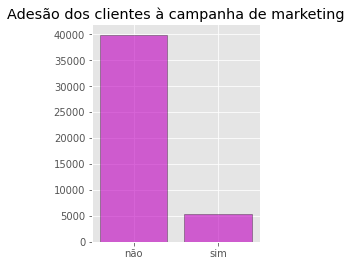

In [ ]:
tamanho = (3,4)
plotar_histograma(df, 'y', tamanho, 'Adesão dos clientes à campanha de marketing', cor='m')

### Educação

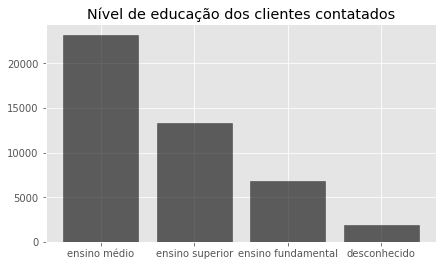

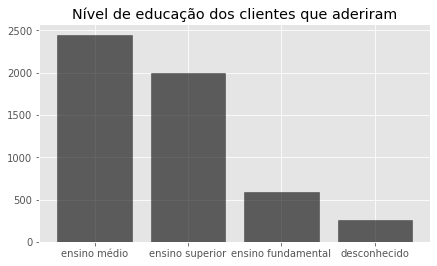

In [ ]:
tamanho = (7,4)
plotar_histograma(df, 'educação', tamanho, 'Nível de educação dos clientes contatados', cor='black')
plotar_histograma(df_alvo, 'educação', tamanho, 'Nível de educação dos clientes que aderiram', cor='black')

### Ocupação

Percebe-se que gestores e estudantes estão mais propensos a aderir à campanha do que operários e domésticos, por exemplo.

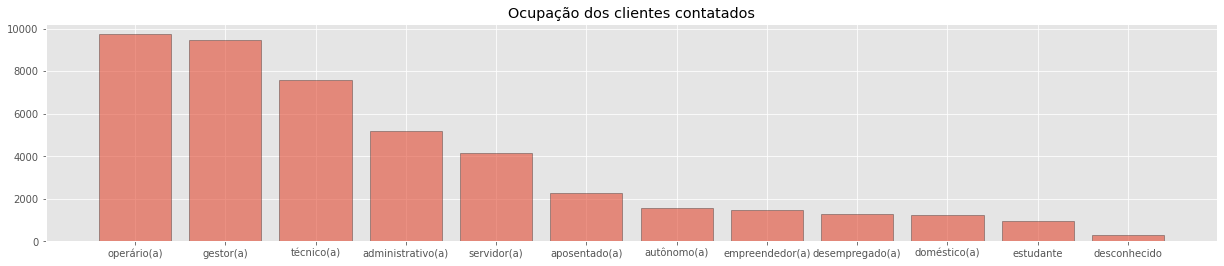

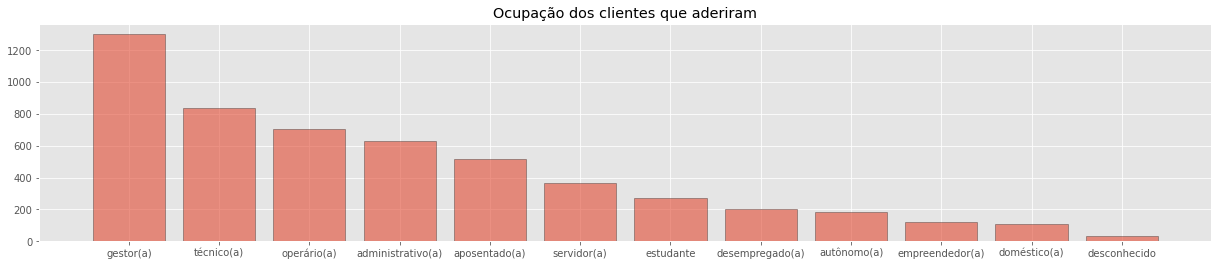

In [ ]:
tamanho = (21,4)
plotar_histograma(df, 'ocupação', tamanho, 'Ocupação dos clientes contatados')
plotar_histograma(df_alvo, 'ocupação', tamanho, 'Ocupação dos clientes que aderiram')

### Estado civil

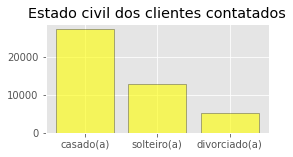

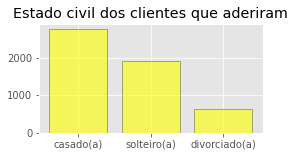

In [ ]:
tamanho = (4,2)
plotar_histograma(df, 'estado civil', tamanho, 'Estado civil dos clientes contatados', cor='yellow')
plotar_histograma(df_alvo, 'estado civil', tamanho, 'Estado civil dos clientes que aderiram', cor='yellow')

### Aluguel

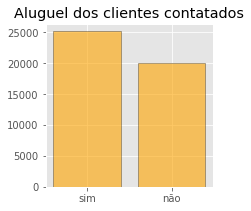

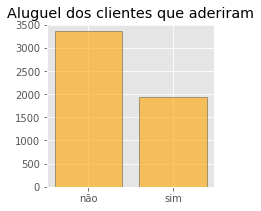

In [ ]:
tamanho = (3,3)
plotar_histograma(df, 'aluguel', tamanho, 'Aluguel dos clientes contatados', cor='orange')
plotar_histograma(df_alvo, 'aluguel', tamanho, 'Aluguel dos clientes que aderiram', cor='orange')

### Empréstimo

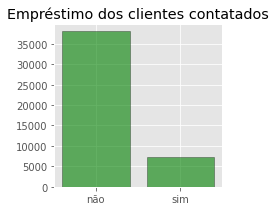

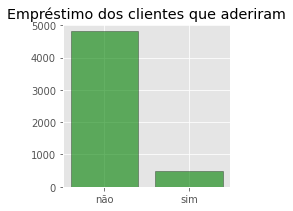

In [ ]:
tamanho = (3,3)
plotar_histograma(df, 'empréstimo', tamanho, 'Empréstimo dos clientes contatados', cor='green')
plotar_histograma(df_alvo, 'empréstimo', tamanho, 'Empréstimo dos clientes que aderiram', cor='green')

### Mês de contato

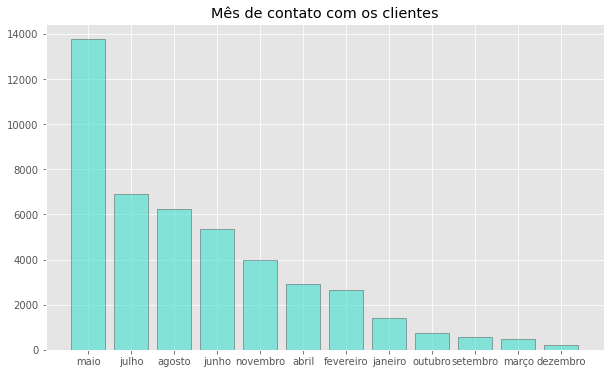

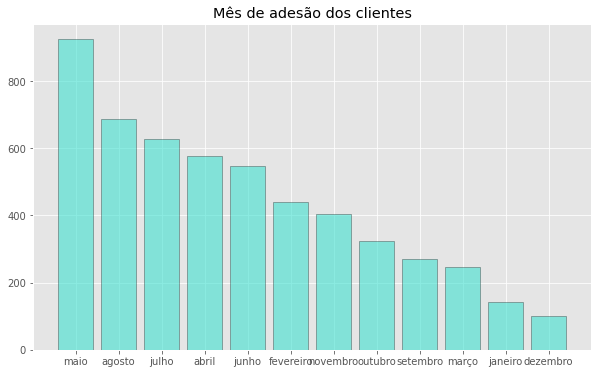

In [ ]:
tamanho = (10,6)
plotar_histograma(df, 'mês', tamanho, 'Mês de contato com os clientes', cor='turquoise')
plotar_histograma(df_alvo, 'mês', tamanho, 'Mês de adesão dos clientes', cor='turquoise')

### Dia de contato

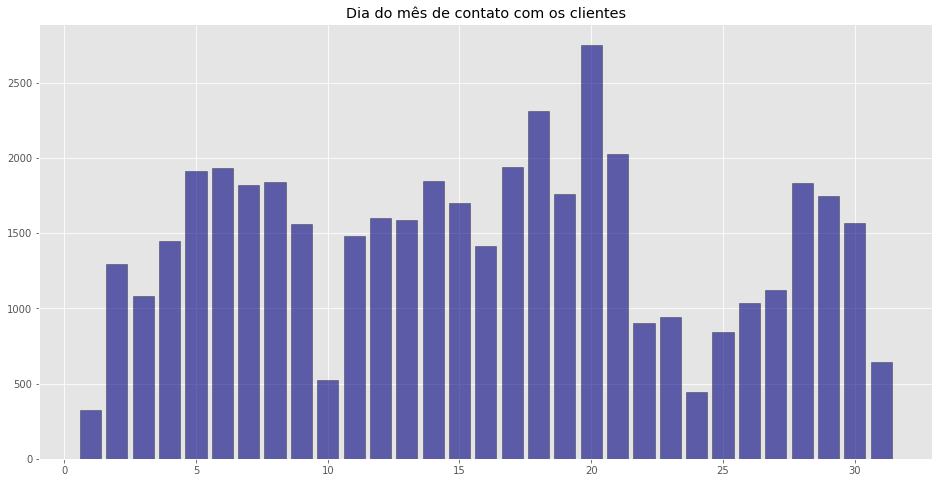

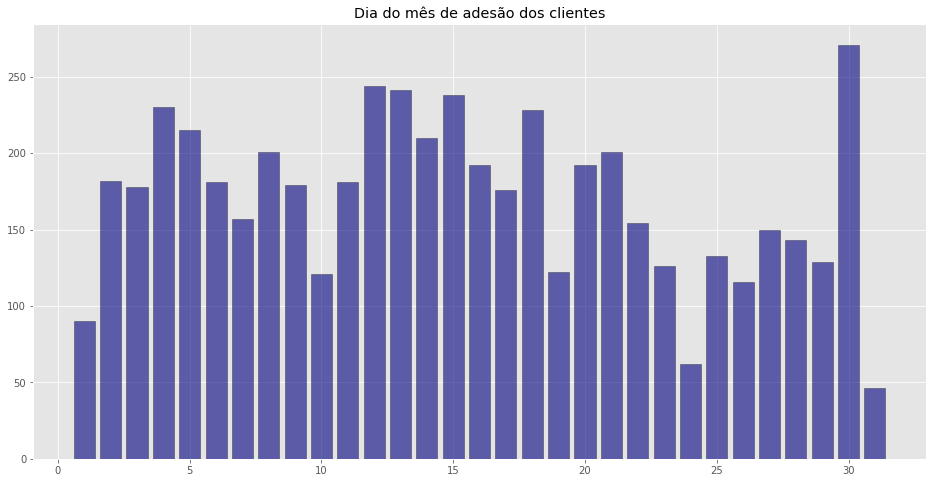

In [ ]:
tamanho = (16,8)
plotar_histograma(df, 'dia do mês', tamanho, 'Dia do mês de contato com os clientes', cor='navy')
plotar_histograma(df_alvo, 'dia do mês', tamanho, 'Dia do mês de adesão dos clientes', cor='navy')

### Ligações anteriores

Percebe-se que insistência não traz resultados muito satisfatórios. São raros os casos em que um cliente aderiu a campanha depois da 10ª ligação.

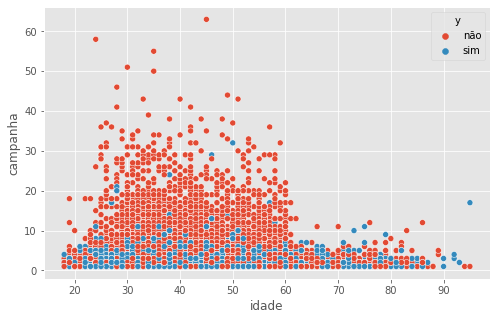

In [ ]:
plt.rcParams['figure.figsize']=8,5
sns.scatterplot(x='idade', y='campanha', data=df, hue='y')

### Campanhas anteriores

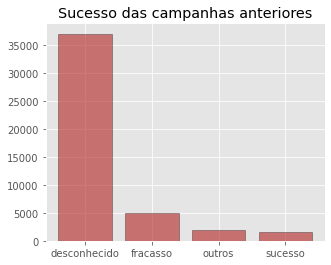

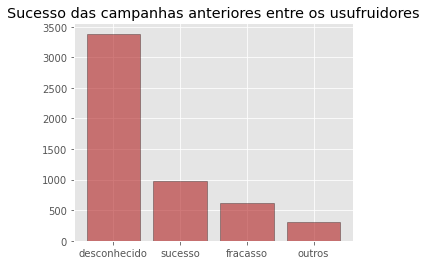

In [ ]:
tamanho = (5,4)
plotar_histograma(df, 'resultado anterior', tamanho, 'Sucesso das campanhas anteriores', cor='firebrick')
plotar_histograma(df_alvo, 'resultado anterior', tamanho, 'Sucesso das campanhas anteriores entre os usufruidores', cor='firebrick')

### Meio de contato

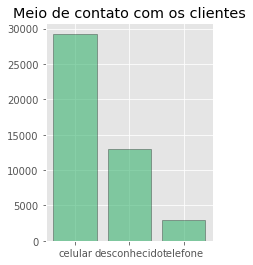

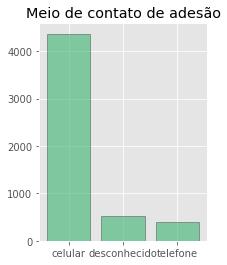

In [ ]:
tamanho = (3,4)
plotar_histograma(df, 'contato', tamanho, 'Meio de contato com os clientes', cor='mediumseagreen')
plotar_histograma(df_alvo, 'contato', tamanho, 'Meio de contato de adesão', cor='mediumseagreen')

# A equipe de telemarketing poderia contatar os clientes por e-mail e investir em marketing no próprio site

# Banco de dados

Para criar um Banco de Dados precisamos da elaboração do Modelo Conceitual, Modelo Lógico e Modelo Físico. 

## Modelo Conceitual 

O Modelo Conceitual é o primeiro passo para criação do Banco de Dados. Baseado no Dataset há três entidades, sendo elas, Campanha, Contato e Cliente. 

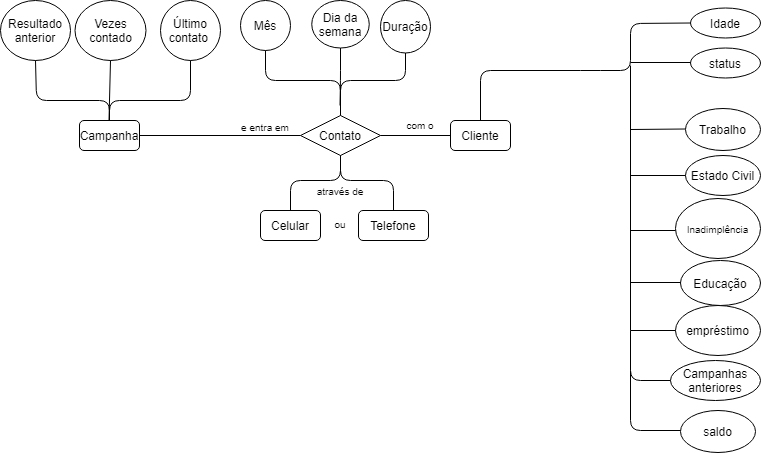

## Modelo Lógico

Com base no Modelo Conceitual criamos o Modelo Modelo Lógico, com as mesmas entidades e organizando os atributos.

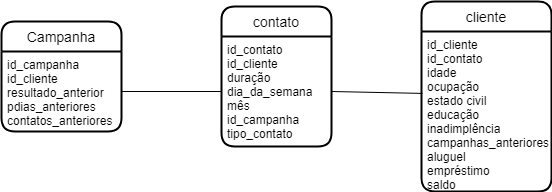

## Modelo Físico

Agora para a etapa final, iremos programar em SQLite junto com python, através da biblioteca **sqlite3**, aplicando o Modelo Lógico ao Modelo Físico. 

Para isso, criamos um script .py, chamado main.py.

### Código

```
import pandas as pd
import sqlite3 as sql

def criar_table():
  """ Função que cria as entidades do dataset, de acordo com o modelo físico

  """
  conexao = sql.connect("Bank_data.db") # Criar um arquivo database vazio (até então)
  cursor = conexao.cursor() # cursor que navega pelo database em sqlite
  cursor.execute("CREATE TABLE Campanha(Id_campanha INT, Id_cliente INT, resultado_anterior TEXT, pdias_anteriores INT, campanha INT);") # Criação da tabela Campanha e seus atributos 
  cursor.execute("CREATE TABLE Contato(Id_contato INT, Id_cliente INT, id_campanha INT, duração INT, dia_da_semana INT, mes INT, tipo_contato TEXT);")# Criação da tabela Contato e seus atributos 
  cursor.execute("CREATE TABLE Cliente(Id_cliente INT, Id_contato INT, idade INT, ocupação TEXT, estado_civil TEXT, educação TEXT, inadimplencia TEXT, campanhas_anteriores INT, aluguel TEXT, emprestimo TEXT, status_final TEXT, saldo INT);")# Criação da tabela Cliente e seus atributos 
  conexao.commit()
  conexao.close()


def criar_Campanha(df):
  """ Função que popula a entidade Campanha
      
      df: datadrame
  """
  conexao = sql.connect("Bank_data.db") # Conexão com o arquivo database
  cursor = conexao.cursor() # cursor que navega pelo database em sqlite
  Id = (len(df))
  for i in range(Id): # criar um loop para todas as linhas do dataset
    # atributos da tabela 
    ra = str(df['resultado anterior'][i])
    pdias = int(df['pdias'][i])
    campanha = int(df['campanha'][i])

    # inserir todos os dados da tabela  
    s1 = "INSERT INTO Campanha VALUES ({},{},'{}',{},{})".format(i+1,i+1,ra,pdias,campanha)
    cursor.execute(s1)
    i += 1 
  #Encerrar o cursor
  conexao.commit()
  conexao.close()

def criar_Contato(df):
  """ Função que popula a entidade Contato
      
      df: datadrame
  """
  conexao = sql.connect("Bank_data.db") # Conexão com o arquivo database
  cursor = conexao.cursor()  # cursor que navega pelo database em sqlite
  Id = (len(df))
  for i in range(Id): # criar um loop para todas as linhas do dataset
    Id = (len(df))
    # atributos da tabela 
    duracao = df['duração'][i]
    dia = df['dia do mês'][i]
    mes = df['mês'][i]
    tipo = df['contato'][i]
    campanha = df['campanha'][i]

    # inserir todos os dados da tabela  
    s2 = "INSERT INTO Contato VALUES ({},{},{},'{}','{}','{}','{}')".format(i+1,i+1,i+1,duracao,dia,mes,tipo)
    cursor.execute(s2)

    i += 1 
  #Encerrar o cursor
  conexao.commit()
  conexao.close()


def criar_Cliente(df):
  """ Função que popula a entidade Cliente
      
      df: datadrame
  """
  conexao = sql.connect("Bank_data.db") # Conexão com o arquivo database
  cursor = conexao.cursor() # cursor que navega pelo database em sqlite
  
  Id = len(df)

  for i in range(Id): # criar um loop para todas as linhas do dataset

    # atributos da tabela 
    idade = df['idade'][i]
    ocupacao = df['ocupação'][i]
    es = df['estado civil'][i]
    educ = df['educação'][i]
    inadimplência = df['inadimplente'][i]
    anteriores = df['anteriores'][i]
    aluguel = df['aluguel'][i]
    emprestimos = df['empréstimo'][i]
    status = df['y'][i]
    balanco = df['saldo'][i]
    

  # inserir todos os dados da tabela 
    s3 = "INSERT INTO Cliente VALUES ({},{},{},'{}','{}','{}','{}','{}','{}','{}','{}',{})".format(i+1,i+1,idade,ocupacao,es,educ,inadimplência,anteriores,aluguel,emprestimos,status,balanco)
    cursor.execute(s3)
    i += 1
  #Encerrar o cursor
  conexao.commit()
  conexao.close()


def main():
  df = criar_dataframe('bank-full.csv', ';')
  df = traduzir(df)
  criar_table()
  criar_Campanha(df)
  criar_Cliente(df)
  criar_Contato(df)
main()

```




In [ ]:
!python main.py

In [ ]:
import sqlite3 as sql # para criar, manipular e analisar a base de dados

conexao = sql.connect("Bank_data.db") # Conexão com o database
cursor = conexao.cursor() # Cursor que navega pelo database

## Questões 

### 1.**Qual a proporção de emprestimos aceito, de acordo com o tipo de contato ?**


PARA SABER SE O TIPO DE CONTATO INFLUENCIA NA TAXA DE ADESÃO TEMOS A SEGUINTE SOLUÇÃO:




> Totais de contato por telefone



In [ ]:
q1_1 = "select * from Contato where tipo_contato = 'telefone' "
cursor.execute(q1_1)
total_t = cursor.fetchall()
len(total_t) 

2906

> Totais contato por telefone que aderiram a campanha




In [ ]:
q1_2 = "select Contato.tipo_contato, Cliente.status_final from Contato, Cliente where Cliente.Id_cliente = Contato.Id_cliente and Contato.tipo_contato = 'telefone' and Cliente.status_final = 'sim'; "
cursor.execute(q1_2)
aderiram_t = cursor.fetchall()
len(aderiram_t)

390

> Totais contato por telefone que não aderiram a campanha




In [ ]:
q1_3 = "select Contato.tipo_contato, Cliente.status_final from Contato, Cliente where Cliente.Id_cliente = Contato.Id_cliente and Contato.tipo_contato = 'telefone' and Cliente.status_final = 'não'; "
cursor.execute(q1_3)
n_aderiram_t = cursor.fetchall()
len(n_aderiram_t)

2516

> Totais de contato por celular


In [ ]:
q1_4 = "select * from Contato where tipo_contato = 'celular' "
cursor.execute(q1_4)
total_c = cursor.fetchall()
len(total_c)

29285

> Totais contato por celular que aderiram a campanha


In [ ]:
q1_5 = "select Contato.tipo_contato, Cliente.status_final from Contato, Cliente where Cliente.Id_cliente = Contato.Id_cliente and Contato.tipo_contato = 'celular' and Cliente.status_final = 'sim'; "
cursor.execute(q1_5)
aderiram_c = cursor.fetchall()
len(aderiram_c)

4369


> Totais contato por celular que não aderiram a campanha



In [ ]:
q1_6 = "select Contato.tipo_contato, Cliente.status_final from Contato, Cliente where Cliente.Id_cliente = Contato.Id_cliente and Contato.tipo_contato = 'celular' and Cliente.status_final = 'não'; "
cursor.execute(q1_6)
n_aderiram_c = cursor.fetchall()
len(n_aderiram_c)

24916

#### RESULTADO

> Proporção total tipo de contato telefone







In [ ]:
t_n = len(n_aderiram_t) / len(total_t)
t_s = len(aderiram_t) / len(total_t)

print(f'CONTATO POR TELEFONE \nNão aderiram: {round(t_n*100, 2)}% \n Aderiram: {round(t_s*100, 2)}%')

CONTATO POR TELEFONE 
Não aderiram: 86.58% 
 Aderiram: 13.42%


> Proporção total tipo de contato celular


In [ ]:
c_n = len(n_aderiram_c) / len(total_c)
c_s = len(aderiram_c) / len(total_c)

print(f'CONTATO POR CELULAR \nNão aderiram: {round(c_n*100, 2)}% \nAderiram: {round(c_s*100, 2)}%')

CONTATO POR CELULAR 
Não aderiram: 85.08% 
Aderiram: 14.92%


Portanto, não há diferença relevante em porcentagem do número de adesões de acordo com o tipo de contato.



### 2.**Qual a duração média das ligações com os clientes que aderiram ?**




PARA SABER QUANTO TEMPO TEM UMA LIGAÇÃO COM ADESÃO A CAMPANHA TEMOS A SEGUINTE SOLUÇÃO:

In [ ]:
q2_1 = "select avg(Contato.duração) from Contato,Cliente where Cliente.Id_cliente = Contato.Id_cliente and Cliente.status_final = 'sim'; "
cursor.execute(q2_1)
media = cursor.fetchall()
print(f'{ round(media[0][0]/60, 2) } minutos')

8.95 minutos


Para uma ligação com adesão a duração é aproximadamente de 9 minutos.

### 3.**Quais as ocupações dos clientes contatados?**

PARA SABER QUAIS AS OCUPAÇÕES FORAM CONTATADAS PELA CAMPANHA FIZEMOS A SEGUINTE SOLUÇÃO:

In [ ]:
q3_1 = "select Cliente.ocupação from Cliente "
cursor.execute(q3_1)
trabalhos = cursor.fetchall()
ocu_cliente = remove_repetidos(trabalhos) 

print('OCUPAÇÕES DOS CLIENTES\n')
for i in ocu_cliente: print(i[0])

OCUPAÇÕES DOS CLIENTES

administrativo(a)
aposentado(a)
autônomo(a)
desconhecido
desempregado(a)
doméstico(a)
empreendedor(a)
estudante
gestor(a)
operário(a)
servidor(a)
técnico(a)


### 4.**Qual a taxa de adesão por ocupação? Qual a proporção por ocupação no Banco de Dados?**

SABENDO AS OCUPAÇÕES, CALCULAMOS A TAXA DE ADESÃO POR OCUPAÇÃO E COMPARAMOS COM A PROPORÇÃO DE OCUPAÇÃO NO BANCO DE DADOS, PARA DESCOBRIR SE A PROPORÇÃO ESTABELICIDA É JUSTIFICADA.

In [ ]:
#Total de ligações 
q4_13 = "select  Count(*) from Cliente  "
cursor.execute(q4_13)
total_t = cursor.fetchall()

In [ ]:
#administrativo(a)

# total Clientes que aderiram com ocupação administrativa 
q4_1 = "select  Count(*) from Cliente where Cliente.status_final = 'sim' and Cliente.ocupação = 'administrativo(a)'; "
cursor.execute(q4_1)
admin_s = cursor.fetchall()

# total Clientes com ocupação administrativa 
q4_1 = "select  Count(*) from Cliente where Cliente.ocupação = 'administrativo(a)'; "
cursor.execute(q4_1)
admin_t = cursor.fetchall()

# proporção de ocupação administrativa na população  
porce_admin_t = admin_t[0][0]/total_t[0][0]

# taxa de adesão em ocupação administrativa
porce_admin_s = admin_s[0][0]/admin_t[0][0]

In [ ]:
#operário(a)

# total Clientes que aderiram com ocupação operária 
q4_2 = "select  Count(*) from Cliente where Cliente.status_final = 'sim' and Cliente.ocupação = 'operário(a)'; "
cursor.execute(q4_2)
blue_c_s = cursor.fetchall()

# total Clientes com ocupação operária 
q4_2 = "select  Count(*) from Cliente where Cliente.ocupação = 'operário(a)'; "
cursor.execute(q4_2)
blue_c_t = cursor.fetchall()

# proporção de ocupação operária na população  
porce_blue_c_t = blue_c_t[0][0]/total_t[0][0]

# taxa de adesão em ocupação operária
porce_blue_s = blue_c_s[0][0]/blue_c_t[0][0]

In [ ]:
#empreendedor(a)

# total Clientes que aderiram com ocupação empreendedora 
q4_3 = "select  Count(*) from Cliente where Cliente.status_final = 'sim' and Cliente.ocupação = 'empreendedor(a)'; "
cursor.execute(q4_3)
empree_s = cursor.fetchall()

# total Clientes com ocupação empreendedora 
q4_3 = "select  Count(*) from Cliente where Cliente.ocupação = 'empreendedor(a)'; "
cursor.execute(q4_3)
empree_t = cursor.fetchall()

# proporção de ocupação empreendedora na população  
porce_empree_t = empree_t[0][0]/total_t[0][0]

# taxa de adesão em ocupação empreendedora
porce_empree_s = empree_s[0][0]/empree_t[0][0]

In [ ]:
#doméstico(a)

# total Clientes que aderiram com ocupação doméstica 
q4_4 = "select  Count(*) from Cliente where Cliente.status_final = 'sim' and Cliente.ocupação = 'doméstico(a)'; "
cursor.execute(q4_4)
house_s = cursor.fetchall()

# total Clientes com ocupação doméstica 
q4_4 = "select  Count(*) from Cliente where Cliente.ocupação = 'doméstico(a)'; "
cursor.execute(q4_4)
house_t = cursor.fetchall()

# proporção de ocupação doméstica na população  
porce_house_t = house_t[0][0]/total_t[0][0]

# taxa de adesão em ocupação doméstica
porce_house_s = house_s[0][0]/house_t[0][0]

In [ ]:
#gestor(a)

# total Clientes que aderiram com ocupação gestora 
q4_5 = "select  Count(*) from Cliente where Cliente.status_final = 'sim' and Cliente.ocupação = 'gestor(a)'; "
cursor.execute(q4_5)
manage_s = cursor.fetchall()

# total Clientes com ocupação gestora 
q4_5 = "select  Count(*) from Cliente where Cliente.ocupação = 'gestor(a)'; "
cursor.execute(q4_5)
manage_t = cursor.fetchall()

# proporção de ocupação gestora na população  
porce_manage_t = manage_t[0][0]/total_t[0][0]

# taxa de adesão em ocupação gestora
porce_manage_s = manage_s[0][0]/manage_t[0][0]

In [ ]:
#aposentado(a)

# total Clientes que aderiram com ocupação aposentada 
q4_6 = "select  Count(*) from Cliente where Cliente.status_final = 'sim' and Cliente.ocupação = 'aposentado(a)'; "
cursor.execute(q4_6)
retired_s = cursor.fetchall()

# total Clientes com ocupação aposentada 
q4_6 = "select  Count(*) from Cliente where Cliente.ocupação = 'aposentado(a)'; "
cursor.execute(q4_6)
retired_t = cursor.fetchall()

# proporção de ocupação aposentada na população  
porce_retired_t = retired_t[0][0]/total_t[0][0]

# taxa de adesão em ocupação aposentada
porce_retired_s = retired_s[0][0]/retired_t[0][0]

In [ ]:
#autônomo(a)

# total Clientes que aderiram com ocupação autônoma 
q4_7 = "select  Count(*) from Cliente where Cliente.status_final = 'sim' and Cliente.ocupação = 'autônomo(a)'; "
cursor.execute(q4_7)
self_em_s = cursor.fetchall()

# total Clientes com ocupação autônoma 
q4_7 = "select  Count(*) from Cliente where Cliente.ocupação = 'autônomo(a)'; "
cursor.execute(q4_7)
self_em_t = cursor.fetchall()

# proporção de ocupação autônoma na população  
porce_self_em_t = self_em_t[0][0]/total_t[0][0]

# taxa de adesão em ocupação autônoma
porce_self_em_s = self_em_s[0][0]/self_em_t[0][0]

In [ ]:
#servidor(a)

# total Clientes que aderiram com ocupação servidora 
q4_8 = "select  Count(*) from Cliente where Cliente.status_final = 'sim' and Cliente.ocupação = 'servidor(a)'; "
cursor.execute(q4_8)
service_s = cursor.fetchall()

# total Clientes que aderiram com ocupação servidora 
q4_8 = "select  Count(*) from Cliente where Cliente.ocupação = 'servidor(a)'; "
cursor.execute(q4_8)
service_t = cursor.fetchall()

# proporção de ocupação servidora na população  
porce_service_t = service_t[0][0]/total_t[0][0]

# taxa de adesão em ocupação servidora
porce_serv_em_s = service_s[0][0]/service_t[0][0]

In [ ]:
#estudante

# total Clientes que aderiram com ocupação estudante 
q4_9 = "select  Count(*) from Cliente where Cliente.status_final = 'sim' and Cliente.ocupação = 'estudante'; "
cursor.execute(q4_9)
student_s = cursor.fetchall()

# total Clientes que aderiram com ocupação estudante 
q4_9 = "select  Count(*) from Cliente where Cliente.ocupação = 'estudante'; "
cursor.execute(q4_9)
student_t = cursor.fetchall()

# proporção de ocupação estudante na população  
porce_student_t = student_t[0][0]/total_t[0][0]

# taxa de adesão em ocupação estudante
porce_student_s = student_s[0][0]/student_t[0][0]

In [ ]:
#técnico(a)

# total Clientes que aderiram com ocupação técnica 
q4_10 = "select  Count(*) from Cliente where Cliente.status_final = 'sim' and Cliente.ocupação = 'técnico(a)'; "
cursor.execute(q4_10)
tech_s = cursor.fetchall()

# total Clientes que aderiram com ocupação técnica 
q4_10 = "select  Count(*) from Cliente where Cliente.ocupação = 'técnico(a)'; "
cursor.execute(q4_10)
tech_t = cursor.fetchall()

# proporção de ocupação técnica na população  
porce_tech_t = tech_t[0][0]/total_t[0][0]

# taxa de adesão em ocupação técnica
porce_tech_s = tech_s[0][0]/tech_t[0][0]

In [ ]:
#desempregado(a)

# total Clientes que aderiram com ocupação desempregado 
q4_11 = "select  Count(*) from Cliente where Cliente.status_final = 'sim' and Cliente.ocupação = 'desempregado(a)'; "
cursor.execute(q4_11)
unemployed_s = cursor.fetchall()

# total Clientes que aderiram com ocupação desempregado 
q4_11 = "select  Count(*) from Cliente where Cliente.ocupação = 'desempregado(a)'; "
cursor.execute(q4_11)
unemployed_t = cursor.fetchall()

# proporção de ocupação desempregado na população  
porce_unemployed_t = unemployed_t[0][0]/total_t[0][0]

# taxa de adesão em ocupação desempregado
porce_unemployed_s = unemployed_s[0][0]/unemployed_t[0][0]

In [ ]:
#desconhecido

# total Clientes que aderiram com ocupação desconhecida
q4_12 = "select  Count(*) from Cliente where Cliente.status_final = 'sim' and Cliente.ocupação = 'desconhecido'; "
cursor.execute(q4_12)
unknown_s = cursor.fetchall()

# total Clientes que aderiram com ocupação desconhecido 
q4_12 = "select  Count(*) from Cliente where Cliente.ocupação = 'desconhecido'; "
cursor.execute(q4_12)
unknown_t = cursor.fetchall()

# proporção de ocupação desconhecido na população  
porce_unknown_t = unknown_t[0][0]/total_t[0][0]

# taxa de adesão em ocupação desconhecido
porce_unknown_s = unknown_s[0][0]/unknown_t[0][0]

#### GRAFICAMENTE

In [ ]:
indices_s = ['administrativo(a)','operário(a)','empreendedor(a)','doméstico(a)','gestor(a)','aposentado(a)','autônomo(a)','servidor(a)','estudante','técnico(a)','desempregado(a)','desconhecido']

#taxa de adesão por ocupação
valores_s = [porce_admin_s, porce_blue_s,porce_empree_s,porce_house_s,porce_manage_s,porce_retired_s,porce_self_em_s,porce_serv_em_s,porce_student_s,porce_tech_s,porce_unemployed_s,porce_unknown_s]

In [ ]:
#proporção por ocupação
valores_t = [porce_admin_t, porce_blue_c_t,porce_empree_t,porce_house_t,porce_manage_t,porce_retired_t,porce_self_em_t,porce_service_t,porce_student_t,porce_tech_t,porce_unemployed_t,porce_unknown_t]

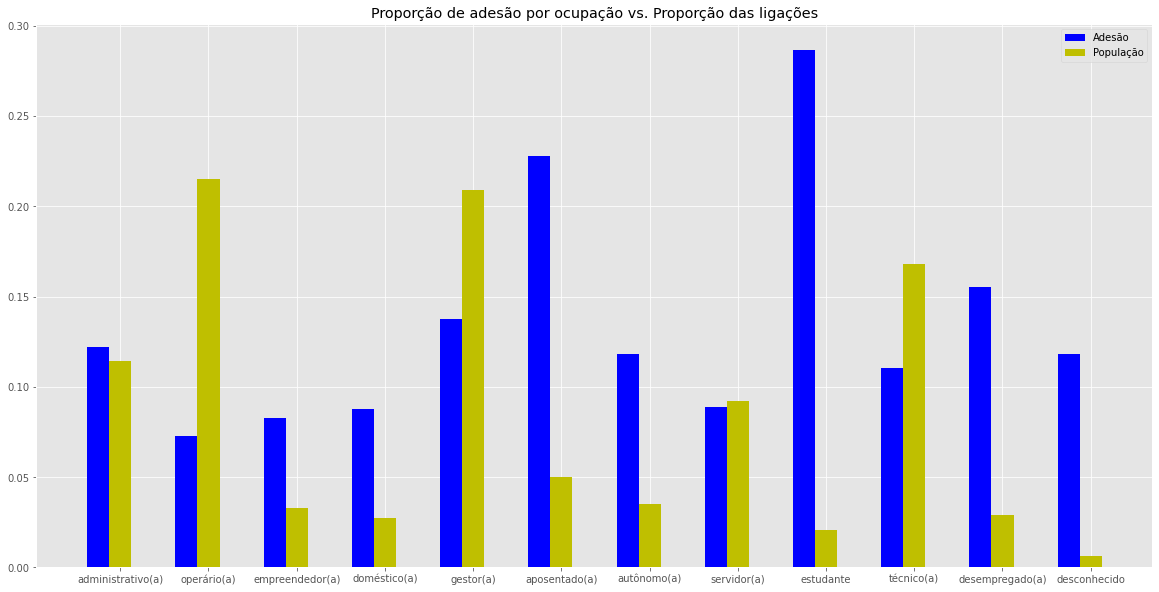

In [ ]:
import numpy as np
# Cria eixo x para Adeção e População com uma separação de 0.25 entre as barras
x1 =  np.arange(len(valores_s))
x2 = [x + 0.25 for x in x1]


plt.figure(figsize = (20,10))

# Plota as barras
plt.bar(x1, valores_s, width=0.25, label = 'Adesão', color = 'b')
plt.bar(x2, valores_t, width=0.25, label = 'População', color = 'y')

# coloca o nome dos meses como label do eixo x
plt.xticks([x + 0.25 for x in range(len(valores_s))], indices_s)

# inseri uma legenda no gráfico
plt.legend()

plt.title("Proporção de adesão por ocupação vs. Proporção das ligações")
plt.show()

Analisando o gráfico, as ocupações operário e gestor têm bastante ligações, e estudante e aposentado tem pouca ligação em comparação, porém a taxa de adesão é bem superior, não justificando a distribuição de ligação. 

### 5.**Qual o saldo médio dos clientes que aderiram e dos clientes que recusaram?**

PARA SABER COMO O SALDO DO CLIENTE AFETA NA ADESÃO TEMOS A SEGUINTE SOLUÇÃO:

In [ ]:
#média saldo clientes que não aderiram
q5_1 = "select  avg(Cliente.saldo) from Cliente where Cliente.status_final = 'não'"
cursor.execute(q5_1)
saldo_n = cursor.fetchall()

#média saldo clientes que aderiram
q5_2 = "select  avg(Cliente.saldo) from Cliente where Cliente.status_final = 'sim'"
cursor.execute(q5_2)
saldo_s = cursor.fetchall()

print(f'Saldo médio dos clientes que recusaram { round(saldo_n[0][0],2) }€\nSaldo médio dos clientes que aceitaram { round(saldo_s[0][0],2) }€ ' )

Saldo médio dos clientes que recusaram 1303.71€
Saldo médio dos clientes que aceitaram 1804.27€ 


Em média quem aderiu a campanha tem um saldo de 500 euros a mais de quem não aderiu.

### 6.Diferença de taxa de adesão em relação a média de saldo 

In [ ]:
#Média de saldo do BD
q6_1 = "select  avg(Cliente.saldo) from Cliente "
cursor.execute(q6_1)
media_saldo = cursor.fetchall()
print(f'Média  de saldo dos clientes contatados : { round(media_saldo[0][0],2)}€')

Média  de saldo dos clientes contatados : 1362.27€


In [ ]:
# Taxa de adesão com saldo igual ou abaixo da média
q6_1 = "select  count(Cliente.saldo) from Cliente where Cliente.status_final = 'sim' and Cliente.saldo <= 1362.27 "
cursor.execute(q6_1)
saldo_menor_s = cursor.fetchall()

q6_1 = "select  count(Cliente.saldo) from Cliente where Cliente.saldo <= 1362.27 "
cursor.execute(q6_1)
saldo_menor_t = cursor.fetchall()
taxa_menor_media = saldo_menor_s[0][0]/ saldo_menor_t[0][0]

print(f'Taxa de adesão de clientes com saldo menor ou igual a média geral: { round(taxa_menor_media*100,2)}%')

Taxa de adesão de clientes com saldo menor ou igual a média geral: 10.19%


In [ ]:
# Taxa de adesão com saldo superior a média
q6_1 = "select  count(Cliente.saldo) from Cliente where Cliente.status_final = 'sim' and Cliente.saldo > 1362.27 "
cursor.execute(q6_1)
saldo_maior_s = cursor.fetchall()

q6_1 = "select  count(Cliente.saldo) from Cliente where Cliente.saldo > 1362.27 "
cursor.execute(q6_1)
saldo_maior_t = cursor.fetchall()
taxa_maior_media = saldo_maior_s[0][0]/ saldo_maior_t[0][0]
print(f'Taxa de adesão de clientes com saldo maior a média geral: { round(taxa_maior_media*100,2)}%')


Taxa de adesão de clientes com saldo maior a média geral: 15.99%


Explorando ainda mais o saldo de cliente, concluimos que o saldo é relevante para adesão ou não, sendo adesão maior quanto maior o saldo. 

### 7.**Em qual mês foram realizadas mais ligações?**

PARA SABER EM QUE MÊS FOI REALIZADO MAIS ESORÇOS TEMOS A SEGUINTE SOLUÇÃO:

In [ ]:
#janeiro
q7_1 = "select  count(*) from Contato where Contato.mes = 'janeiro' "
cursor.execute(q7_1)
janeiro = cursor.fetchall()

#fevereiro
q7_1 = "select  count(*) from Contato where Contato.mes = 'fevereiro' "
cursor.execute(q7_1)
fevereiro = cursor.fetchall()

#março
q7_1 = "select  count(*) from Contato where Contato.mes = 'março' "
cursor.execute(q7_1)
marco = cursor.fetchall()

#abril
q7_1 = "select  count(*) from Contato where Contato.mes = 'abril' "
cursor.execute(q7_1)
abril = cursor.fetchall()

#maio
q7_1 = "select  count(*) from Contato where Contato.mes = 'maio' "
cursor.execute(q7_1)
maio = cursor.fetchall()

#junho
q7_1 = "select  count(*) from Contato where Contato.mes = 'junho' "
cursor.execute(q7_1)
junho = cursor.fetchall()

#julho
q7_1 = "select  count(*) from Contato where Contato.mes = 'julho' "
cursor.execute(q7_1)
julho = cursor.fetchall()

#agosto
q7_1 = "select  count(*) from Contato where Contato.mes = 'agosto' "
cursor.execute(q7_1)
agosto = cursor.fetchall()

#setembro
q7_1 = "select  count(*) from Contato where Contato.mes = 'setembro' "
cursor.execute(q7_1)
setembro = cursor.fetchall()

#outubro
q7_1 = "select  count(*) from Contato where Contato.mes = 'outubro' "
cursor.execute(q7_1)
outubro = cursor.fetchall()

#novembro
q7_1 = "select  count(*) from Contato where Contato.mes = 'novembro' "
cursor.execute(q7_1)
novembro = cursor.fetchall()

#dezembro
q7_1 = "select  count(*) from Contato where Contato.mes = 'dezembro' "
cursor.execute(q7_1)
dezembro = cursor.fetchall()

In [ ]:
valores_mes = [janeiro[0][0],fevereiro[0][0],marco[0][0],abril[0][0],maio[0][0],junho[0][0],julho[0][0],agosto[0][0],setembro[0][0],outubro[0][0],novembro[0][0],dezembro[0][0]]
indice_mes = ['janeiro','fevereiro','marco','abril','maio','junho','julho','agosto','setembro','outubro','novembro','dezembro']

####GRAFICAMENTE

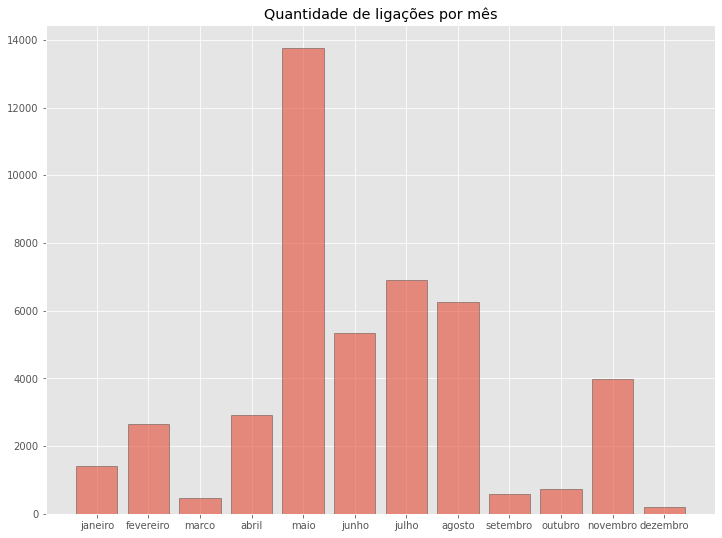

In [ ]:
plotar_histograma_1(valores_mes,indice_mes,tamanho = (12,9),titulo='Quantidade de ligações por mês')

Analisando o gráfico, observamos esforço maciço no mês de maio, será que esse esforço teve resultado em adesão? 

###**8.Mês com maior taxa de adeção ?**

APÓS ANALISARMOS O MÊS COM MAIS LIGAÇÕES, IREMOS ANALISAR OS MESES EM TAXA DE ADESÃO:

In [ ]:
#janeiro
q8_1 = "select  count(*) from Contato,Cliente where Cliente.Id_cliente = Contato.Id_cliente and Cliente.status_final = 'sim' and Contato.mes = 'janeiro' "
cursor.execute(q8_1)
janeiro_s = cursor.fetchall()
prop_jan = janeiro_s[0][0]/janeiro[0][0]

#fevereiro
q8_1 = "select  count(*) from Contato,Cliente where Cliente.Id_cliente = Contato.Id_cliente and Cliente.status_final = 'sim' and Contato.mes = 'fevereiro' "
cursor.execute(q8_1)
fevereiro_s = cursor.fetchall()
prop_fev = fevereiro_s[0][0]/fevereiro[0][0]

#março
q8_1 = "select  count(*) from Contato,Cliente where Cliente.Id_cliente = Contato.Id_cliente and Cliente.status_final = 'sim' and Contato.mes = 'março' "
cursor.execute(q8_1)
marco_s = cursor.fetchall()
prop_mar = marco_s[0][0]/marco[0][0]


#abril
q7_1 = "select  count(*) from Contato,Cliente where Cliente.Id_cliente = Contato.Id_cliente and Cliente.status_final = 'sim' and Contato.mes = 'abril' "
cursor.execute(q7_1)
abril_s = cursor.fetchall()
prop_abr = abril_s[0][0]/abril[0][0]


#maio
q8_1 = "select  count(*) from Contato,Cliente where Cliente.Id_cliente = Contato.Id_cliente and Cliente.status_final = 'sim' and Contato.mes = 'maio' "
cursor.execute(q8_1)
maio_s = cursor.fetchall()
prop_maio = maio_s[0][0]/maio[0][0]


#junho
q7_1 = "select  count(*) from Contato,Cliente where Cliente.Id_cliente = Contato.Id_cliente and Cliente.status_final = 'sim' and Contato.mes = 'junho' "
cursor.execute(q7_1)
junho_s = cursor.fetchall()
prop_jun = junho_s[0][0]/junho[0][0]

#julho
q8_1 = "select  count(*) from Contato,Cliente where Cliente.Id_cliente = Contato.Id_cliente and Cliente.status_final = 'sim' and Contato.mes = 'julho' "
cursor.execute(q8_1)
julho_s = cursor.fetchall()
prop_jul = julho_s[0][0]/julho[0][0]

#agosto
q8_1 = "select  count(*) from Contato,Cliente where Cliente.Id_cliente = Contato.Id_cliente and Cliente.status_final = 'sim' and Contato.mes = 'agosto' "
cursor.execute(q8_1)
agosto_s = cursor.fetchall()
prop_ago = agosto_s[0][0]/agosto[0][0]

#setembro
q8_1 = "select  count(*) from Contato,Cliente where Cliente.Id_cliente = Contato.Id_cliente and Cliente.status_final = 'sim' and Contato.mes = 'setembro' "
cursor.execute(q8_1)
setembro_s = cursor.fetchall()
prop_set = setembro_s[0][0]/agosto[0][0]

#outubro
q8_1 = "select  count(*) from Contato,Cliente where Cliente.Id_cliente = Contato.Id_cliente and Cliente.status_final = 'sim' and Contato.mes = 'outubro' "
cursor.execute(q8_1)
outubro_s = cursor.fetchall()
prop_out = outubro_s[0][0]/outubro[0][0]

#novembro
q8_1 = "select  count(*) from Contato,Cliente where Cliente.Id_cliente = Contato.Id_cliente and Cliente.status_final = 'sim' and Contato.mes = 'novembro' "
cursor.execute(q8_1)
novembro_s = cursor.fetchall()
prop_nov = novembro_s[0][0]/novembro[0][0]

#dezembro
q8_1 = "select  count(*) from Contato,Cliente where Cliente.Id_cliente = Contato.Id_cliente and Cliente.status_final = 'sim' and Contato.mes = 'dezembro' "
cursor.execute(q8_1)
dezembro_s = cursor.fetchall()
prop_dez = dezembro_s[0][0]/dezembro[0][0]


#### GRAFICAMENTE

In [ ]:
valores_mes_s = [prop_jan,prop_fev,prop_mar,prop_abr,prop_maio,prop_jun,prop_jul,prop_ago,prop_set,prop_out,prop_nov,prop_dez]
indice_mes = ['janeiro','fevereiro','marco','abril','maio','junho','julho','agosto','setembro','outubro','novembro','dezembro']

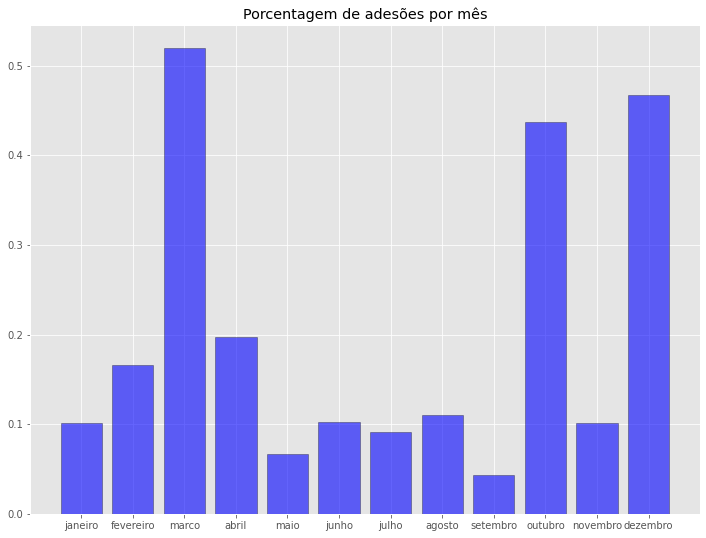

In [ ]:
plotar_histograma_1(valores_mes_s,indice_mes,tamanho = (12,9),titulo='Porcentagem de adesões por mês',cor='b')

Ao analisar o gráfico podemos ver que maio foi um mês com taxa de adesão baixa, ou seja, quantidade de ligação não significa taxa de adesão alta.

### 9.**Qual a porcentagem de adesão por educação em comparação a proporção de ligação ?**



PARA SABER SE A EDUCAÇÃO AFETA NA ADEÇÃO FORMULAMOS A SEGUINTE SOLUÇÃO:

In [ ]:
#Total população
q9_5 = "select Count(Cliente.educação)  from Cliente "
cursor.execute(q9_5)
educ_total = cursor.fetchall()

In [ ]:
#Desconhecido que aderiram
q9_1 = "select Count(Cliente.educação)  from Cliente where Cliente.educação = 'desconhecido' and Cliente.status_final = 'sim'"
cursor.execute(q9_1)
educ_des = cursor.fetchall()


#Desconhecidos totais
q9_2 =  "select Count(Cliente.educação)  from Cliente where Cliente.educação = 'desconhecido'"
cursor.execute(q9_2)
educ_des_t = cursor.fetchall()

prop_des_t = educ_des_t[0][0]/educ_total[0][0]

prop_des_s = educ_des[0][0]/educ_des_t[0][0]

In [ ]:
#Ensino Fundamental que aderiram
q9_1 = "select Count(Cliente.educação)  from Cliente where Cliente.educação = 'ensino fundamental' and Cliente.status_final = 'sim'"
cursor.execute(q9_1)
educ_ef = cursor.fetchall()


#Ensino Fundamental totais
q9_2 =  "select Count(Cliente.educação)  from Cliente where Cliente.educação = 'ensino fundamental'"
cursor.execute(q9_2)
educ_ef_t = cursor.fetchall()

prop_ef_t = educ_ef_t[0][0]/educ_total[0][0]

prop_ef_s = educ_ef[0][0]/educ_ef_t[0][0]

In [ ]:
#Ensino Fundamental que aderiram
q9_1 = "select Count(Cliente.educação)  from Cliente where Cliente.educação = 'ensino médio' and Cliente.status_final = 'sim'"
cursor.execute(q9_1)
educ_em = cursor.fetchall()


#Ensino Fundamental totais
q9_2 =  "select Count(Cliente.educação)  from Cliente where Cliente.educação = 'ensino médio'"
cursor.execute(q9_2)
educ_em_t = cursor.fetchall()

prop_em_t = educ_em_t[0][0]/educ_total[0][0]

prop_em_s = educ_em[0][0]/educ_em_t[0][0]

In [ ]:
#Ensino Fundamental que aderiram
q9_1 = "select Count(Cliente.educação)  from Cliente where Cliente.educação = 'ensino superior' and Cliente.status_final = 'sim'"
cursor.execute(q9_1)
educ_es = cursor.fetchall()


#Ensino Fundamental totais
q9_2 =  "select Count(Cliente.educação)  from Cliente where Cliente.educação = 'ensino superior'"
cursor.execute(q9_2)
educ_es_t = cursor.fetchall()

prop_es_t = educ_es_t[0][0]/educ_total[0][0]

prop_es_s = educ_es[0][0]/educ_es_t[0][0]

In [ ]:
valores_educ_t = [prop_des_t,prop_ef_t,prop_em_t,prop_es_t]
valores_educ_s = [prop_des_s,prop_ef_s,prop_em_s,prop_es_s]
indices_educ = ['Desconhecido','Ensino Fundamnetal','Ensino Médio','Ensino Superior']

#### GRAFICAMENTE 

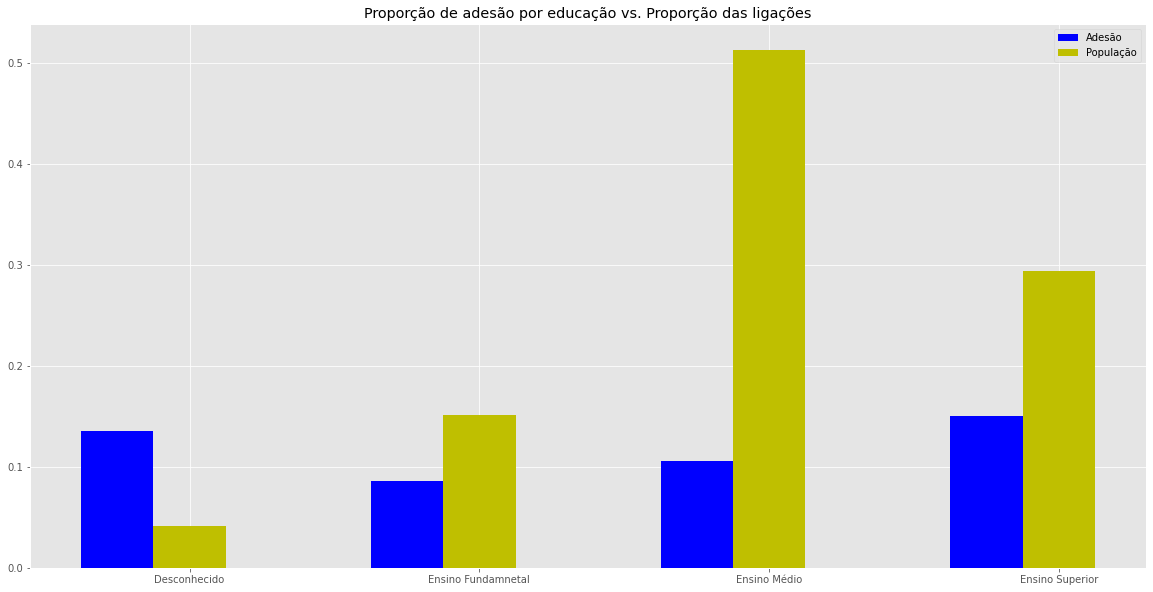

In [ ]:
# Cria eixo x para Adeção e População com uma separação de 0.25 entre as barras
x1 =  np.arange(len(valores_educ_s))
x2 = [x + 0.25 for x in x1]


plt.figure(figsize = (20,10))

# Plota as barras
plt.bar(x1, valores_educ_s, width=0.25, label = 'Adesão', color = 'b')
plt.bar(x2, valores_educ_t, width=0.25, label = 'População', color = 'y')

# coloca o nome dos meses como label do eixo x
plt.xticks([x + 0.25 for x in range(len(valores_educ_s))], indices_educ)

# inseri uma legenda no gráfico
plt.legend()

plt.title("Proporção de adesão por educação vs. Proporção das ligações")
plt.show()

Podemos perceber que o ensino superior tem taxa de adeção quase 2x maior do que a taxa de ensino fundamental, portanto a educação do cliente é um fator relevante para adesão.
Podemos ver também que a ligação para quem tem ensino médio é muito superior as outras, com uma taxa de adeção média.

### 10.Média de idade de adesão e não adesão?

In [ ]:
#Média de idade das pessoas que aderiram
q10_1 = "select avg(Cliente.idade) from Cliente where Cliente.status_final = 'sim'"
cursor.execute(q10_1)
media_idade_s = cursor.fetchall()

#Média de idade das pessoas que não aderiram
q10_2 = "select avg(Cliente.idade) from Cliente where Cliente.status_final = 'não'"
cursor.execute(q10_2)
media_idade_n = cursor.fetchall()

print(f'Média de idade pessoa que aderiram: {round(media_idade_s[0][0],2)} \nMédia de idade pessoa que não aderiram: {round(media_idade_n[0][0],2)} \n')

Média de idade pessoa que aderiram: 41.67 
Média de idade pessoa que não aderiram: 40.84 



Portanto, não há uma diferença relevante da méda de idade de quem aderiu ou não a campanha.

# Modelos preditivos
Nesta seção, utilizaremos a biblioteca *scikit-learn* para identificar padrões através da coletânea de dados deste projeto e prever classificações de instâncias aleatórias. <p>
A seção **Com viés de desbalanceamento** conta com o dataset desproporcional, isto é, 89:11 de proporção em recusa/adesão da campanha. <br>
Já a seção **Sem viés de desbalanceamento** iguala as classificações, ou seja, 50:50 de proporção em recusa/adesão da campanha.

## Com viés de desbalanceamento

### KNN
*(K — Nearest Neighbors)* é um dos muitos algoritmos de aprendizagem supervisionada usado no campo de *machine learning*. É um classificador onde o aprendizado é baseado “no quão similar” é um dado do outro. O treinamento é formado por vetores de *n* dimensões.

#### Tratamento dos dados

In [ ]:
# Definição das classes X e Y

X = df_modelo.loc[:, df_modelo.columns != 'y']
y = df_modelo.loc[:, df_modelo.columns == 'y']

In [ ]:
# Padronização dos dados (média = 0 e desvio padrão = 1)
from sklearn.preprocessing import StandardScaler

padronizador = StandardScaler()
X_std = padronizador.fit_transform(X)

#### Busca do melhor $k$

In [ ]:
# Criação da variável de 'KNeighborsClassifier'
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier() 

# Criação da Pipeline para mapeamento
from sklearn.pipeline import Pipeline
pipe = Pipeline([('padronizador', padronizador), ('knn', knn)]) 

# Definição da lista de busca entre os números plausíveis
lista_busca = [x for x in range(1,4)]
    
# Definição do espaço de busca do algoritmo
espaço_de_busca = [{'knn__n_neighbors': lista_busca}] 

# Aplicação do algoritmo GridSearchCV, para buscar o número de vizinhos ideal
from sklearn.model_selection import GridSearchCV
classificador = GridSearchCV(pipe, espaço_de_busca, cv=5, verbose=0).fit(X_std, y) 

# Impressão do melhor número de vizinhos, de acordo com o algoritmo
melhor_k = classificador.best_estimator_.get_params()['knn__n_neighbors']
melhor_k

2

#### Divisão dos conjuntos de treinamento e teste

In [ ]:
# Divisão do dataset: 70% para treinamento e 30% para teste
from sklearn.model_selection import train_test_split

X_treino, X_teste, y_treino, y_teste = train_test_split(X_std, y, random_state=0, test_size=.3)

#### Predição do conjunto de teste

In [ ]:
# Predição das classificações do já definido conjunto de teste
classif = KNeighborsClassifier(n_neighbors=melhor_k, metric='manhattan')
classif.fit(X_treino, y_treino)

# Impressão das predições
y_predito = classif.predict(X_teste)
y_predito

array([0, 0, 0, ..., 0, 0, 0])

#### Avaliação da predição

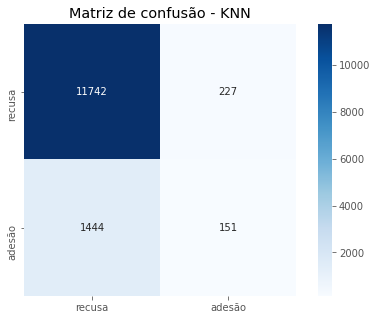

In [ ]:
# Impressão do mapa de calor da matriz de confusão

legendas = ['recusa', 'adesão']
titulo = 'Matriz de confusão - KNN'
mapa_de_calor(y_teste, y_predito, legendas, titulo)

In [ ]:
# Impressão do F1, da precisão, da revocação e da acurácia do modelo preditivo

avaliacao(y_teste, y_predito)

f1: 15.31%
precisão: 39.95%
revocação: 9.47%
acurácia: 87.68%


In [ ]:
# Persistência do modelo
from sklearn.externals import joblib

filename = 'KNN_modelo_marketing_desb.sav'
joblib.dump(knn, filename)

['KNN_modelo_marketing_desb.sav']

### Regresssão linear simples
É uma equação para se estimar a condicional de uma variável y, dados os valores de alguma outra variáveis x.

#### Tratamento dos dados

In [ ]:
# Definição das classes X e Y

X = df_tratado[['duração']]
y = df_tratado[['y']]

#### Treino do modelo

In [ ]:
# Criação e treinamento do modelo de Regressão Linear
from sklearn.linear_model import LinearRegression

modelo = LinearRegression()
modelo.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#### Visualização dos coeficientes

In [ ]:
# Visualização do coeficiente encontrado

modelo.coef_

array([[0.00049238]])

In [ ]:
# Visualização do R²

correlação = modelo.score(X, y)
print(f'O índice de correlação da duração da ligação com a sua resposta é igual a {round(correlação*100,2)}%. \nEsta variável quantitativa é a que mais tem correlação com a adesão do cliente.')

O índice de correlação da duração da ligação com a sua resposta é igual a 15.56%. 
Esta variável quantitativa é a que mais tem correlação com a adesão do cliente.


#### Divisão dos conjuntos de treinamento e teste

In [ ]:
# Divisão do dataset: 70% para treinamento e 30% para teste

X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, random_state=0, test_size=.3)

#### Predição do conjunto de teste

In [ ]:
# Impressão das predições

X_predito = modelo.predict(X_teste)
X_predito

array([[0.0346772 ],
       [0.51819349],
       [0.10951882],
       ...,
       [0.08096083],
       [0.06323518],
       [0.09671696]])

In [ ]:
# Persistência do modelo com 'joblib'

filename = 'Reg_linear_modelo_marketing.sav'
joblib.dump(modelo, filename)

['Reg_linear_modelo_marketing.sav']

### Regressão logística

#### Tratamento dos dados

In [ ]:
# Definição das classes X e Y

X = df_modelo.loc[:, df_modelo.columns != 'y']
y = df_modelo.loc[:, df_modelo.columns == 'y']

In [ ]:
# Padronização dos dados (média = 0 e desvio padrão = 1)

padronizador = StandardScaler()
X_std = padronizador.fit_transform(X)

#### Divisão dos conjuntos de treinamento e teste

In [ ]:
# Divisão do dataset: 70% para treinamento e 30% para teste

X_treino, X_teste, y_treino, y_teste = train_test_split(X_std, y, random_state=0, test_size=0.3)

#### Treino do modelo

In [ ]:
# Criação e treinamento do modelo de Regressão Logística
from sklearn.linear_model import LogisticRegression

modelo = LogisticRegression(class_weight="balanced")
modelo.fit(X_treino, y_treino)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

#### Predição do conjunto de teste

In [ ]:
# Impressão das predições

y_predito = modelo.predict(X_teste)
y_predito

array([0, 0, 0, ..., 0, 1, 0])

#### Avaliação da predição

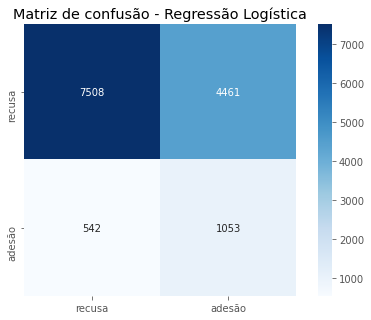

In [ ]:
# Impressão do mapa de calor da matriz de confusão

titulo = 'Matriz de confusão - Regressão Logística'
mapa_de_calor(y_teste, y_predito, legendas, titulo)

In [ ]:
# Impressão do F1, da precisão, da revocação e da acurácia do modelo preditivo

avaliacao(y_teste, y_predito)

f1: 29.62%
precisão: 19.1%
revocação: 66.02%
acurácia: 63.12%


In [ ]:
# Persistência do modelo com 'joblib'

filename = 'Reg_logistica_modelo_marketing_desb.sav'
joblib.dump(modelo, filename)

['Reg_logistica_modelo_marketing_desb.sav']

## Sem viés de desbalanceamento

In [ ]:
# Definição das classes X e Y

X = df_modelo.loc[:, df_modelo.columns != 'y']
y = df_modelo.loc[:, df_modelo.columns == 'y']

In [ ]:
# Geração de dados sintéticos (não duplicados) da classe de adesão a partir de vizinhos
from imblearn.over_sampling import SMOTE

os = SMOTE(random_state=0)

In [ ]:
# Divisão do dataset: 70% para treinamento e 30% para teste

X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, random_state=0, test_size=0.3)

In [ ]:
colunas = X_treino.columns
os_data_X, os_data_y = os.fit_sample(X_treino, y_treino)
os_data_X = pd.DataFrame(data=os_data_X, columns=colunas)
os_data_y = pd.DataFrame(data=os_data_y, columns=['y'])

In [ ]:
print(f'Quantidade de instâncias: {len(os_data_X)}')

Quantidade de instâncias: 55906


In [ ]:
recusas = len(os_data_y[os_data_y['y']==0])
adesões = len(os_data_y[os_data_y['y']==1])
print(f'Quantidade de recusas: {recusas} \nQuantidade de adesões: {adesões}')

Quantidade de recusas: 27953 
Quantidade de adesões: 27953


### Regressão logística

#### Tratamento dos dados

In [ ]:
# Definição das classes X e Y

X = os_data_X
y = os_data_y

In [ ]:
# Padronização dos dados (média = 0 e desvio padrão = 1)

padronizador = StandardScaler()
X_std = padronizador.fit_transform(X)

#### Divisão dos conjuntos de treinamento e teste

In [ ]:
# Divisão do dataset: 70% para treinamento e 30% para teste

X_treino, X_teste, y_treino, y_teste = train_test_split(X_std, y, random_state=0, test_size=0.3)

#### Treino do modelo

In [ ]:
# Criação e treinamento do modelo de Regressão Logística

modelo = LogisticRegression()
modelo.fit(X_treino, y_treino)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
coeficientes = modelo.coef_
coeficientes

array([[-0.09138888, -0.01309753, -0.23684118, -0.38060424, -0.161137  ,
         0.04810163, -0.87526752, -0.57026053, -0.62248115,  0.26864866,
         0.10665013]])

In [ ]:
colunas = X.columns
colunas

Index(['idade', 'ocupação', 'estado civil', 'educação', 'inadimplente',
       'saldo', 'aluguel', 'empréstimo', 'campanha', 'pdias', 'anteriores'],
      dtype='object')

#### Predição do conjunto de teste

In [ ]:
# Impressão das predições

y_predito = modelo.predict(X_teste)
y_predito

array([1, 0, 1, ..., 0, 1, 0])

#### Avaliação da predição

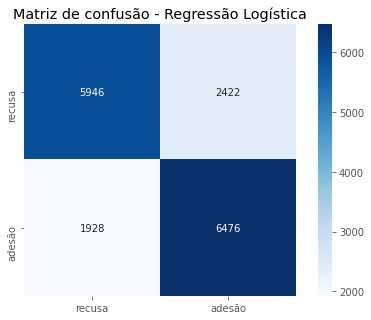

In [ ]:
# Impressão do mapa de calor da matriz de confusão

titulo = 'Matriz de confusão - Regressão Logística'
mapa_de_calor(y_teste, y_predito, legendas, titulo)

In [ ]:
# Impressão do F1, da precisão, da revocação e da acurácia do modelo preditivo

avaliacao(y_teste, y_predito)

f1: 74.86%
precisão: 72.78%
revocação: 77.06%
acurácia: 74.06%


In [ ]:
# Persistência do modelo com 'joblib'

filename = 'Reg_logistica_modelo_marketing_balanceado.sav'
joblib.dump(modelo, filename)

['Reg_logistica_modelo_marketing_balanceado.sav']

### KNN

#### Tratamento dos dados

In [ ]:
# Definição das classes X e Y

X = os_data_X
y = os_data_y

In [ ]:
# Padronização dos dados (média = 0 e desvio padrão = 1)

padronizador = StandardScaler()
X_std = padronizador.fit_transform(X)

#### Divisão dos conjuntos de treinamento e teste

In [ ]:
# Divisão do dataset: 70% para treinamento e 30% para teste

X_treino, X_teste, y_treino, y_teste = train_test_split(X_std, y, random_state=0, test_size=0.3)

#### Predição do conjunto de teste

In [ ]:
# Predição das classificações do já definido conjunto de teste
classif = KNeighborsClassifier(n_neighbors=2, metric='manhattan')
classif.fit(X_treino, y_treino)

# Impressão das predições
y_predito = classif.predict(X_teste)
y_predito

array([1, 0, 0, ..., 0, 1, 0])

#### Avaliação da predição

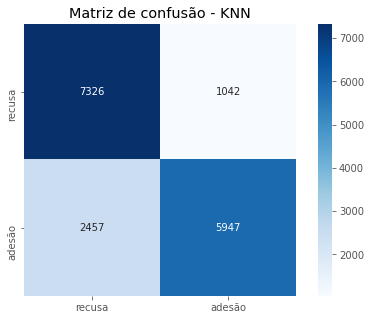

In [ ]:
# Impressão do mapa de calor da matriz de confusão

titulo = 'Matriz de confusão - KNN'
mapa_de_calor(y_teste, y_predito, legendas, titulo)

In [ ]:
# Impressão do F1, da precisão, da revocação e da acurácia do modelo preditivo

avaliacao(y_teste, y_predito)

f1: 77.27%
precisão: 85.09%
revocação: 70.76%
acurácia: 79.14%


In [ ]:
# Persistência do modelo com 'joblib'

filename = 'KNN_modelo_marketing_balanceado.sav'
joblib.dump(classif, filename)

['KNN_modelo_marketing_balanceado.sav']